In [1]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


# **Object Detection(객체 탐지)**
- 이미지 내에서 객체(사물, 사람 등)를 감지해 내는 것

<img src="https://drive.google.com/uc?id=1E69C5zmiyhjIXLnmdU9U2zDpMi57VlHg">

- 활용 분야
  - 야생동물 감지
  - 얼굴 표정 분석
  - 폭력 / 비폭력 감지

### **객체 탐지 알고리즘의 역사**
<img src="https://drive.google.com/uc?id=1c523JTFYl66Pb1lO-r1cKmj7JTf_txd_">

- 발전 순서

  1) **Traditional Detection Methods**
    - **슬라이딩 윈도우(Sliding Window)**

    <img src="https://drive.google.com/uc?id=1i2CdQtRv02eM9Bako4LP2XxSTYoAOul_">

      - 고정된 크기의 window(=초록박스)로 이미지의 좌상단부터 우하단으로 일일이 객체를 검출해 나가는 방식
      - **문제점** : 객체가 없는 영역도 무조건 Sliding해야 하며 여러 Scale의 이미지를 스캔하여 검출하는 방식이므로 수행시간이 길고, 성능은 떨어짐
<br><br>
    - **선택적 검색(Selective Search)**

    <img src="https://drive.google.com/uc?id=1dDKAb5XX3cJTB4CFW7ImKm3nNV7abEvp">

        1) 처음에 분할된 모든 부분들을 Bounding box로 만들어 리스트에 추가<br>
        2) 색상, 무늬, 크기, 형태에 따라 유사도가 비슷한 부분들을 그룹핑(Bbox 개수 감소)<br>
        3) 1, 2단계를 계속 반복<br><br>

  2) **Two-stage detector**

  <img src="https://drive.google.com/uc?id=1oIsYvIVXLutjN51jZAu6VIC0TYn9XXLl">

    - 영역추정(Region Proposal)과 탐지(Detection) 두 단계를 따로 수행하는 방식
    - Sliding Window의 비효율성으로 인해 R-CNN 알고리즘에서는 '객체가 있을 법한 2000개의 영역'을 찾고 '그 영역에 대해서만 객체를 탐지'하는 두 단계를 제안함
    - 영역추정
      - **문제점** : 객체들이 각기 다른 크기와 형태를 가지고 있다면 후보 영역을 찾는 정확도가 떨어지게 됨

        --> 영역추정의 정확도를 향상시키기 위해 미리 이미지에서 객체 영역을 분할해 두면 후보 영역을 찾기가 더 쉽지 않을까?

    - 객체 탐지
    <br><br>

  3) **One-stage detector**
    - Two-stage detector는 Selective search 방식으로 인해 과거 대비 높은 정확도로 객체 탐지가 가능했지만, 여전히 낮은 속도로 실시간 적용은 어려웠음
    - 영역추정과 객체탐지를 통합해 한 번에 수행  >> 탐시 속도의 획기적인 향상 >> 실시간 탐지 가능


# YOLO(You Only Look Once)
- One-stage detector방식 실시간 객체 검출 알고리즘의 선봉장ㅃ
- 16년 v1부터 22년 v7까지 오픈소스로 출시됨
- v1(GoogLeNet적용)은 Two-stage detector의 Faster R-CNN(VGG16 적용)보다 6배 빠른 속도로 논문에 기재됨

# roboflow
- [https://app.roboflow.com/](https://app.roboflow.com/)<br><br>
- 데이터 준비
  - 데이터 라벨링
  - 데이터 증식(확장)

# Colab
- 라벨링한 데이터 불러오기
- 데이터 경로 설정 : yaml파일 수정
- 학습하기 : train.py파일 실행
- 예측하기 : detect.py파일 실행



### test 폴더 안
- images : cat & dog 사진 데이터
- labels : class(cat 0/ dog 1), 좌상단x, 좌상단y, 우하단x, 우하단y

<img src="https://drive.google.com/uc?id=10-yilu-sfeZr_mCOMSw9y3M6_jkN9o-E">

## Curl
- 리눅스에서 데이터 전송을 위해 사용되는 명령어
- 그러나 코랩에서는 파이썬 환경이기 때문에 이것을 알려주기 위해서 앞에 !가 붙음

In [2]:
# 준비된 데이터를 코랩에서 다운로드해서 사용
# ! : prompt 명령어를 Python파일에서 사용할 때 맨 앞에 붙이는 기호
!curl -L "https://app.roboflow.com/ds/bNZt9a5Xkj?key=KeATsSnk92" > roboflow.zip; unzip roboflow.zip; rm roboflow.zip

  % Total    % Received % Xferd  Average Speed   Time    Time     Time  Current
                                 Dload  Upload   Total   Spent    Left  Speed
100   901  100   901    0     0   3043      0 --:--:-- --:--:-- --:--:--  3043
100 10.9M  100 10.9M    0     0  20.2M      0 --:--:-- --:--:-- --:--:-- 20.2M
Archive:  roboflow.zip
 extracting: README.dataset.txt      
 extracting: README.roboflow.txt     
 extracting: data.yaml               
   creating: test/
   creating: test/images/
 extracting: test/images/cat-1_jpg.rf.15204cf9c57628cf94657b11596cbc2f.jpg  
 extracting: test/images/cat-34_jpg.rf.d6a6f357a5a31c6b59575d443a475f39.jpg  
 extracting: test/images/cat-45_jpg.rf.0cb0458e66e8b22a2102dd66fa4b1303.jpg  
 extracting: test/images/cat-46_jpg.rf.598718c49c30e3693672181876a172c8.jpg  
 extracting: test/images/cat-52_jpg.rf.e3f65e34ed0e954bcd6ea3dd36a0e7d9.jpg  
 extracting: test/images/cat-63_jpg.rf.d8b87f1a678bc128b1ea4ee1555c4d03.jpg  
 extracting: test/images/cat-71_jpg

In [3]:
# % : Linux 명령어를 Python 파일안에서 실행할 때, 사용하는 명령어
# %pwd : print working directory - 현재 위치 확인하는 명령어
%pwd  # print working directory

'/content'

## github에서 YOLOv5 가져오기

- detect.py : 학습하고 검출할 때, 쓰는 파일

In [4]:
# github에 있는 파일 다운로드
!git clone https://github.com/ultralytics/yolov5

Cloning into 'yolov5'...
remote: Enumerating objects: 14329, done.
remote: Counting objects: 100% (135/135), done.
remote: Compressing objects: 100% (94/94), done.
remote: Total 14329 (delta 78), reused 82 (delta 41), pack-reused 14194
Receiving objects: 100% (14329/14329), 13.36 MiB | 21.74 MiB/s, done.
Resolving deltas: 100% (9890/9890), done.


In [5]:
# YOLO를 사용하는데 필요한 라이브러이 설치
# requirement.txt 안에 적혀있음
%cd /content/yolov5
!pip install -r requirements.txt

/content/yolov5
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 1.6 MB 4.8 MB/s 


In [6]:
%pwd

'/content/yolov5'

In [7]:
%cd ../


/content


In [8]:
# make directory
%mkdir dataset

In [9]:
# move
%mv ./README.dataset.txt ./README.roboflow.txt ./data.yaml train test valid /content/dataset

In [10]:
# 파일 내용 보기
# cat : (=concatenate, 연결하다.) 파일의 내용을 보는 명령어
%cat /content/dataset/data.yaml

train: ../train/images
val: ../valid/images

nc: 2
names: ['cat', 'dog']

train: ../train/images  # train 파일 경로<br>
val: ../valid/images  # val 파일 경로<br>
<br><br>
nc: 2  # number of classes<br>
names: ['cat', 'dog']  # classes

## 파일의 모든 경로가 담기 텍스트(txt) 파일 만들기

In [11]:
# 많은 파일들을 다룰때 사용
from glob import glob

train_img_list = glob('/content/dataset/train/images/*.jpg')
test_img_list = glob('/content/dataset/test/images/*.jpg')
valid_img_list = glob('/content/dataset/valid/images/*.jpg')
len(valid_img_list)

39

In [12]:
# train.txt, val.txt 파일에 각각 담아줌
with open('/content/dataset/train.txt', 'w') as f:
  f.write('\n'.join(train_img_list) + '\n')
with open('/content/dataset/val.txt', 'w') as f:
  f.write('\n'.join(valid_img_list) + '\n')

In [13]:
# data.yaml 파일 불러와서 수정
import yaml

with open('/content/dataset/data.yaml', 'r') as f :
  data = yaml.safe_load(f)

print(data)

{'train': '../train/images', 'val': '../valid/images', 'nc': 2, 'names': ['cat', 'dog']}


In [14]:
data['train'] = '/content/dataset/train.txt'
data['val'] = '/content/dataset/val.txt'
data

{'train': '/content/dataset/train.txt',
 'val': '/content/dataset/val.txt',
 'nc': 2,
 'names': ['cat', 'dog']}

In [15]:
# data를 yaml파일에 덮어쓰기
with open('/content/dataset/data.yaml', 'w') as f :
  yaml.dump(data, f)

In [16]:
%pwd

'/content'

In [17]:
%cd /content/yolov5

/content/yolov5


In [ ]:
# train.py : 알아서 학습을 하는 파이썬 파일
# !python train.py 
# --img 416 : 변환할 이미지 크기는 416*416으로 설정
# --batch 16 : 한번에 실행시킬 값(한번에 학습시킬 데이터량은 16으로 설정)
# --epochs 20 : 학습 횟수는 20으로 설정
# --data /content/dataset/data.yaml : 사용할 데이터 (data 경로는 data.yaml파일을 이용)
# --cfg ./models/yolov5s.yaml : 사용할 YOLOv5 모델  / (학습시간이 많이 걸림, 정확도 높음) yolov5x > yolov5l > yolov5m > yolov5n > yolov5s(학습 시간이 조금 걸림, 정확도 낮음-클래스가 적고 맞추기 쉬울 때)
# --weights yolov5s.pt : YOLO모델의 가중치
# --name cat_dog_yolov5s_results : 학습 완료 후, 학습 결과를 저장할 폴더 이름
!python train.py --img 416 --batch 16 --epochs 20 --data /content/dataset/data.yaml --cfg ./models/yolov5s.yaml --weights yolov5s.pt --name cat_dog_yolov5s_results

train: weights=yolov5s.pt, cfg=./models/yolov5s.yaml, data=/content/dataset/data.yaml, hyp=data/hyps/hyp.scratch-low.yaml, epochs=20, batch_size=16, imgsz=416, rect=False, resume=False, nosave=False, noval=False, noautoanchor=False, noplots=False, evolve=None, bucket=, cache=None, image_weights=False, device=, multi_scale=False, single_cls=False, optimizer=SGD, sync_bn=False, workers=8, project=runs/train, name=cat_dog_yolov5s_results, exist_ok=False, quad=False, cos_lr=False, label_smoothing=0.0, patience=100, freeze=[0], save_period=-1, seed=0, local_rank=-1, entity=None, upload_dataset=False, bbox_interval=-1, artifact_alias=latest
github: up to date with https://github.com/ultralytics/yolov5 ✅
YOLOv5 🚀 v6.2-205-geef9057 Python-3.7.15 torch-1.12.1+cu113 CUDA:0 (Tesla T4, 15110MiB)

hyperparameters: lr0=0.01, lrf=0.01, momentum=0.937, weight_decay=0.0005, warmup_epochs=3.0, warmup_momentum=0.8, warmup_bias_lr=0.1, box=0.05, cls=0.5, cls_pw=1.0, obj=1.0, obj_pw=1.0, iou_t=0.2, anchor_

# 학습 결과 확인하기
<img src="https://drive.google.com/uc?id=16kHOtxJ0O0CIrnvhkTA9o1J9mZdVVLs4">

- box_loss : 영역 추정
- obj_loss : 객체 탐지
- 분류 : 정확도
- 회귀 : Methods
- 영역추정과 객체 탐지의 정확도 : mAP (판별 못함 0 ~ 1 판별 잘함)
  - mAP50보다는 mAP50-95가 더 정확함
  - 40.5%는 비교적 쉽게 나오는 수치(잘나온 것 아님)

  <img src="https://drive.google.com/uc?id=16A_7hCqoPsFlONS-n0lhhm6A1HBiEMgM">

In [ ]:
test_img = test_img_list[0]

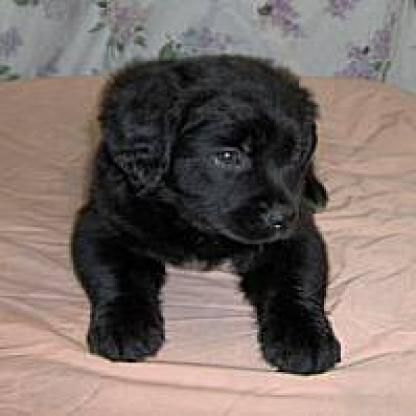

In [ ]:
from IPython.display import Image
Image(test_img)

In [ ]:
# !python detect.py 
# --weights /content/yolov5/runs/train/cat_dog_yolov5s_results/weights/best.pt
# --img 416 
# --conf 0.06 : conf(=confidence) : 판별율 0.06이상만 출력하는 것으로 설정(0.8로 설정해 주는 것이 좋음)
# --source "{test_img}"
rs = !python detect.py --weights /content/yolov5/runs/train/cat_dog_yolov5s_results/weights/best.pt --img 416 --conf 0.06 --source "{test_img}"

In [ ]:
rs

["\x1b\x1bdetect: \x1bweights=['/content/yolov5/runs/train/cat_dog_yolov5s_results/weights/best.pt'], source=/content/dataset/test/images/dog-91_jpg.rf.2f33b6054869763c394f9f38840d737f.jpg, data=data/coco128.yaml, imgsz=[416, 416], conf_thres=0.06, iou_thres=0.45, max_det=1000, device=, view_img=False, save_txt=False, save_conf=False, save_crop=False, nosave=False, classes=None, agnostic_nms=False, augment=False, visualize=False, update=False, project=runs/detect, name=exp, exist_ok=False, line_thickness=3, hide_labels=False, hide_conf=False, half=False, dnn=False, vid_stride=1",
 'YOLOv5 🚀 v6.2-205-geef9057 Python-3.7.15 torch-1.12.1+cu113 CUDA:0 (Tesla T4, 15110MiB)',
 '',
 'Fusing layers... ',
 'YOLOv5s summary: 157 layers, 7015519 parameters, 0 gradients, 15.8 GFLOPs',
 'image 1/1 /content/dataset/test/images/dog-91_jpg.rf.2f33b6054869763c394f9f38840d737f.jpg: 416x416 1 dog, 8.0ms',
 'Speed: 0.4ms pre-process, 8.0ms inference, 1.2ms NMS per image at shape (1, 3, 416, 416)',
 'Resul

- /content/yolov5/detect.py
- detect.py파일 171번째 줄에<br>
  print(xyxy)<br>
  print(names[c])<br>
  print(conf)<br>
  추가<br><br>
- xyxy : 
          [tensor(72., device='cuda:0'), 
          tensor(43., device='cuda:0'), 
          tensor(348., device='cuda:0'), 
          tensor(257., device='cuda:0')]
- names[c] : dog
- conf : tensor(0.40589, device='cuda:0')